<a href="https://colab.research.google.com/github/yashsinghkvojhar/DSML-Kitty-Flask/blob/main/NN_Porter_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [6]:
# Load dataset
df = pd.read_csv("dataset.csv", parse_dates=[1, 2])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722 entries, 0 to 8721
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   market_id                 8679 non-null   float64       
 1   created_at                8721 non-null   datetime64[ns]
 2   actual_delivery_time      8719 non-null   datetime64[ns]
 3   store_id                  8721 non-null   object        
 4   store_primary_category    8474 non-null   object        
 5   order_protocol            8675 non-null   float64       
 6   total_items               8721 non-null   float64       
 7   subtotal                  8721 non-null   float64       
 8   num_distinct_items        8721 non-null   float64       
 9   min_item_price            8721 non-null   float64       
 10  max_item_price            8721 non-null   float64       
 11  total_onshift_partners    8051 non-null   float64       
 12  total_busy_partners 

In [7]:
# Feature engineering
df['time_taken'] = df['actual_delivery_time'] - df['created_at']
df['time_taken_mins'] = pd.to_timedelta(df['time_taken']) / pd.Timedelta('1m')
df['hours'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722 entries, 0 to 8721
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   market_id                 8679 non-null   float64        
 1   created_at                8721 non-null   datetime64[ns] 
 2   actual_delivery_time      8719 non-null   datetime64[ns] 
 3   store_id                  8721 non-null   object         
 4   store_primary_category    8474 non-null   object         
 5   order_protocol            8675 non-null   float64        
 6   total_items               8721 non-null   float64        
 7   subtotal                  8721 non-null   float64        
 8   num_distinct_items        8721 non-null   float64        
 9   min_item_price            8721 non-null   float64        
 10  max_item_price            8721 non-null   float64        
 11  total_onshift_partners    8051 non-null   float64        
 12  total_

In [8]:
# Drop unnecessary features
df.drop(['time_taken', 'created_at', 'actual_delivery_time', 'store_id'], axis=1, inplace=True)
df.dropna(inplace=True)


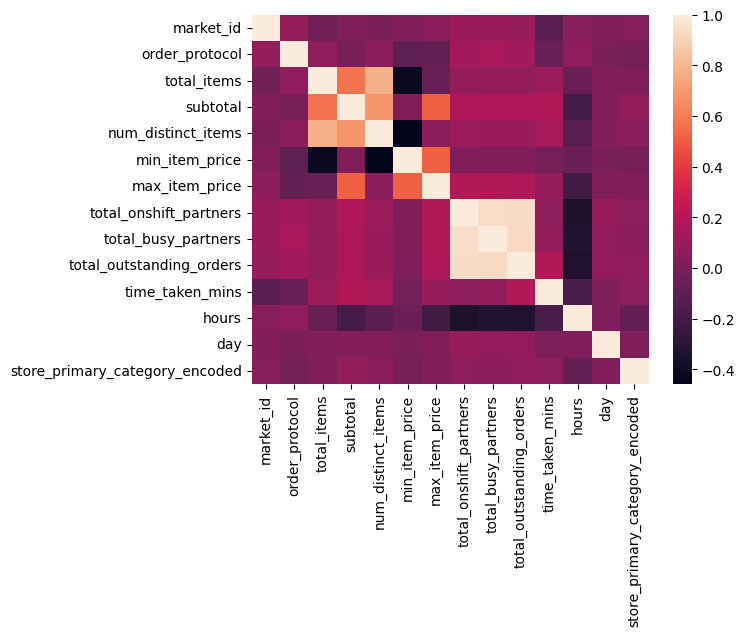

In [9]:
# Encode categorical variable
label_encoder = LabelEncoder()
df['store_primary_category_encoded'] = label_encoder.fit_transform(df['store_primary_category'])
df.drop(['store_primary_category'], axis=1, inplace=True)

# Data visualization
sns.heatmap(df.corr())
plt.show()


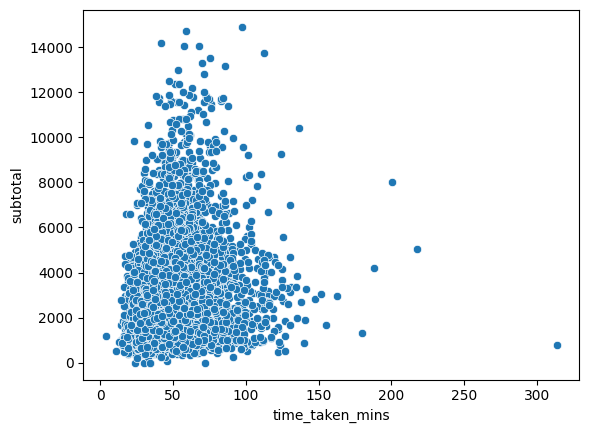

In [10]:
sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)
plt.show()



<ipython-input-11-b346ae0150dc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day'], palette='Set2')


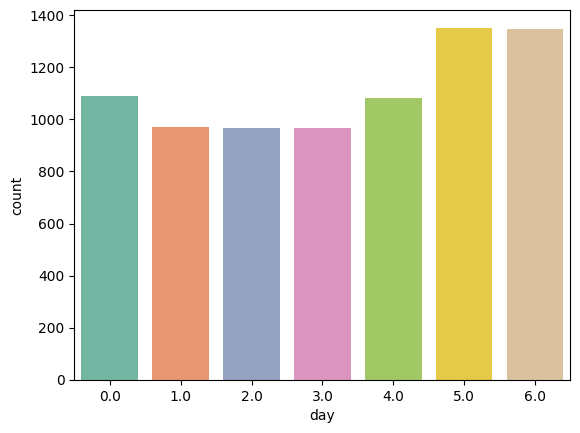

In [11]:
sns.countplot(x=df['day'], palette='Set2')
plt.show()


<ipython-input-12-2dc39cc88ddf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hours'], palette='Set2')


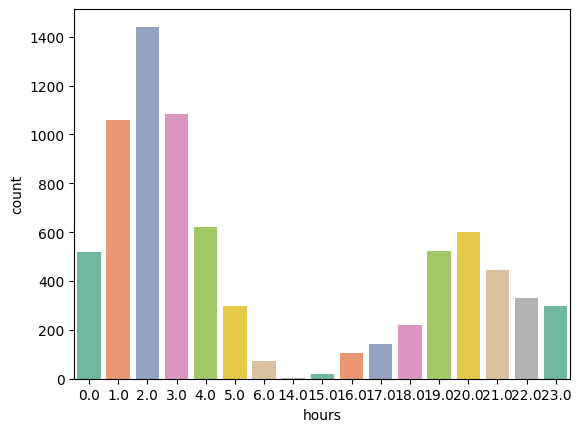

In [12]:
sns.countplot(x=df['hours'], palette='Set2')
plt.show()


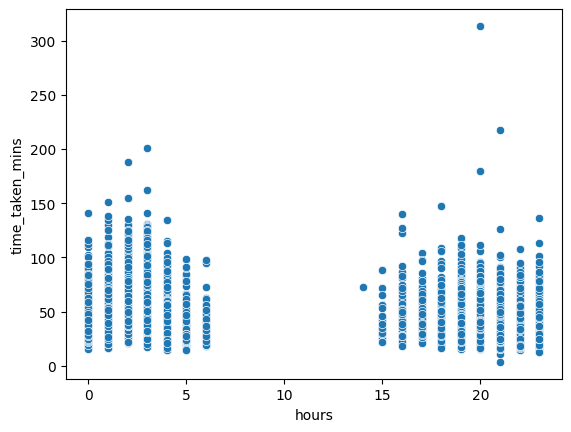

In [13]:

sns.scatterplot(x='hours', y='time_taken_mins', data=df)
plt.show()


In [14]:
# Data modeling
y = df['time_taken_mins']
x = df.drop(['time_taken_mins'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 8717
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   market_id                       7777 non-null   float64
 1   order_protocol                  7777 non-null   float64
 2   total_items                     7777 non-null   float64
 3   subtotal                        7777 non-null   float64
 4   num_distinct_items              7777 non-null   float64
 5   min_item_price                  7777 non-null   float64
 6   max_item_price                  7777 non-null   float64
 7   total_onshift_partners          7777 non-null   float64
 8   total_busy_partners             7777 non-null   float64
 9   total_outstanding_orders        7777 non-null   float64
 10  time_taken_mins                 7777 non-null   float64
 11  hours                           7777 non-null   float64
 12  day                             7777 no

In [16]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Random Forest
regressor = RandomForestRegressor()
regressor = RandomForestRegressor(n_estimators=100, n_jobs=-1)
regressor.fit(x_train, y_train)

prediction = regressor.predict(x_test)

mse = mean_squared_error(y_test, prediction)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, prediction)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

r2 = r2_score(y_test, prediction)

def MAPE(y_actual, y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
    return mape

mape = MAPE(y_test, prediction)




MSE: 292.0994929910871
RMSE: 17.090918436148687
MAE: 11.87771350149957


In [17]:
r2 = r2_score(y_test, prediction)
print(f'r2 : {r2}' )

r2 : 0.22074216469873187


In [18]:
def MAPE(y_actual, y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
    return mape

print = ('mape : ', MAPE(y_test, prediction))

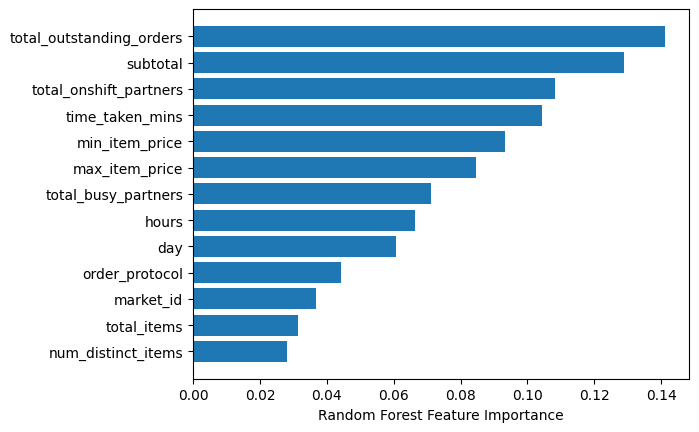

In [19]:
# Feature importance visualization
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()


In [20]:
# Neural Network
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(14, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae'])



# if for 5 consecutive epochs my val_loss doesn't go down, it will stop training.
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, mode='min')
checkpoint = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose = 1, monitor='val_loss', mode='min')
history = model.fit(x_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 1744.3755 - mae: 35.4029 - mse: 1744.3755
Epoch 1: val_loss improved from inf to 660.43896, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 275ms/step - loss: 1688.5391 - mae: 34.5929 - mse: 1688.5391 - val_loss: 660.4390 - val_mae: 22.2646 - val_mse: 660.4390
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 506.8888 - mae: 17.6038 - mse: 506.8888
Epoch 2: val_loss improved from 660.43896 to 378.82675, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 501.8371 - mae: 17.4655 - mse: 501.8371 - val_loss: 378.8268 - val_mae: 15.9482 - val_mse: 378.8268
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 366.5891 - mae: 14.2213 - mse: 366.5891
Epoch 3: val_loss improved from 378.82675 to 301.04019, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - loss: 366.1760 - mae: 14.2091 - mse: 366.1760 - val_loss: 301.0402 - val_mae: 13.0245 - val_mse: 301.0402
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 323.6349 - mae: 13.1605 - mse: 323.6349
Epoch 4: val_loss did not improve from 301.04019
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 324.7739 - mae: 13.1966 - mse: 324.7739 - val_loss: 301.4524 - val_mae: 12.7106 - val_mse: 301.4524
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 324.1889 - mae: 13.1465 - mse: 324.1889
Epoch 5: val_loss improved from 301.04019 to 300.89642, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 324.1263 - mae: 13.1562 - mse: 324.1263 - val_loss: 300.8964 - val_mae: 12.6207 - val_mse: 300.8964
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 329.5653 - mae: 13.0767 - mse: 329.5653
Epoch 6: val_loss improved from 300.89642 to 295.11835, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 328.6458 - mae: 13.0801 - mse: 328.6458 - val_loss: 295.1183 - val_mae: 12.7095 - val_mse: 295.1183
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 330.2040 - mae: 13.2495 - mse: 330.2040
Epoch 7: val_loss did not improve from 295.11835
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 328.9172 - mae: 13.2339 - mse: 328.9172 - val_loss: 305.9632 - val_mae: 13.4929 - val_mse: 305.9632
Epoch 8/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 326.7457 - mae: 13.3776 - mse: 326.7457
Epoch 8: val_loss improved from 295.11835 to 293.36035, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 324.5205 - mae: 13.3191 - mse: 324.5205 - val_loss: 293.3604 - val_mae: 12.5603 - val_mse: 293.3604
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 302.3439 - mae: 12.7803 - mse: 302.3439
Epoch 9: val_loss did not improve from 293.36035
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 302.6481 - mae: 12.7862 - mse: 302.6481 - val_loss: 294.6860 - val_mae: 13.1034 - val_mse: 294.6860
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 292.3149 - mae: 12.7430 - mse: 292.3149
Epoch 10: val_loss improved from 293.36035 to 284.47928, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 293.1443 - mae: 12.7515 - mse: 293.1443 - val_loss: 284.4793 - val_mae: 12.5135 - val_mse: 284.4793
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 311.9524 - mae: 12.7546 - mse: 311.9524
Epoch 11: val_loss improved from 284.47928 to 281.07504, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 310.5066 - mae: 12.7390 - mse: 310.5066 - val_loss: 281.0750 - val_mae: 12.4710 - val_mse: 281.0750
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 285.8566 - mae: 12.3036 - mse: 285.8566
Epoch 12: val_loss improved from 281.07504 to 279.52594, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 286.8036 - mae: 12.3296 - mse: 286.8036 - val_loss: 279.5259 - val_mae: 12.6807 - val_mse: 279.5259
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 292.3504 - mae: 12.5486 - mse: 292.3504
Epoch 13: val_loss improved from 279.52594 to 267.95810, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 291.5295 - mae: 12.5282 - mse: 291.5295 - val_loss: 267.9581 - val_mae: 12.1087 - val_mse: 267.9581
Epoch 14/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 269.6252 - mae: 12.0425 - mse: 269.6252
Epoch 14: val_loss improved from 267.95810 to 265.16516, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 270.3332 - mae: 12.0521 - mse: 270.3332 - val_loss: 265.1652 - val_mae: 12.0744 - val_mse: 265.1652
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 285.1570 - mae: 12.3611 - mse: 285.1570
Epoch 15: val_loss improved from 265.16516 to 263.70920, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - loss: 284.1531 - mae: 12.3375 - mse: 284.1531 - val_loss: 263.7092 - val_mae: 11.6554 - val_mse: 263.7092
Epoch 16/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 296.8626 - mae: 12.5323 - mse: 296.8626
Epoch 16: val_loss did not improve from 263.70920
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 296.1399 - mae: 12.5268 - mse: 296.1399 - val_loss: 278.6445 - val_mae: 12.9961 - val_mse: 278.6445
Epoch 17/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 280.6861 - mae: 12.4691 - mse: 280.6861
Epoch 17: val_loss did not improve from 263.70920
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 279.9877 - mae: 12.4149 - mse: 279.9877 - val_loss: 265.8476 - val_mae: 12.3705 - val_mse: 265.8476
Epoch 18/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 264.7465 - mae: 12.0754 - mse: 264.7465
Epoch 18: val_loss improved from 263.70920 to 259.62415, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 266.2520 - mae: 12.0788 - mse: 266.2520 - val_loss: 259.6241 - val_mae: 11.8275 - val_mse: 259.6241
Epoch 19/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 284.3100 - mae: 12.1311 - mse: 284.3100
Epoch 19: val_loss improved from 259.62415 to 258.59955, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 283.1258 - mae: 12.1214 - mse: 283.1258 - val_loss: 258.5995 - val_mae: 11.8075 - val_mse: 258.5995
Epoch 20/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 278.0362 - mae: 11.8244 - mse: 278.0362
Epoch 20: val_loss did not improve from 258.59955
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 277.4862 - mae: 11.8444 - mse: 277.4862 - val_loss: 258.9247 - val_mae: 11.9654 - val_mse: 258.9247
Epoch 21/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 254.2991 - mae: 11.6493 - mse: 254.2991
Epoch 21: val_loss did not improve from 258.59955
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 256.7205 - mae: 11.7058 - mse: 256.7205 - val_loss: 290.7879 - val_mae: 11.9620 - val_mse: 290.7879
Epoch 22/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 292.5221 - mae: 12.4203 - mse: 292.5221
Epoch 22: val_loss did not improve from 258.59955
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 291.0831 - mae: 12.4004 - mse: 291.0831 - val_loss: 266.85

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 254.4554 - mae: 11.8783 - mse: 254.4554 - val_loss: 254.8839 - val_mae: 11.8417 - val_mse: 254.8839
Epoch 25/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 285.0884 - mae: 12.1195 - mse: 285.0884
Epoch 25: val_loss did not improve from 254.88394
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 284.0122 - mae: 12.1096 - mse: 284.0122 - val_loss: 256.0650 - val_mae: 11.6962 - val_mse: 256.0650
Epoch 26/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 259.3882 - mae: 11.8144 - mse: 259.3882
Epoch 26: val_loss did not improve from 254.88394
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 260.0961 - mae: 11.8255 - mse: 260.0961 - val_loss: 259.3603 - val_mae: 11.7110 - val_mse: 259.3603
Epoch 27/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 273.2840 - mae: 11.7810 - mse: 273.2840
Epoch 27: val_loss improved from 254.88394 to 254.67375, saving model to model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - loss: 272.5823 - mae: 11.7883 - mse: 272.5823 - val_loss: 254.6738 - val_mae: 11.6844 - val_mse: 254.6738
Epoch 28/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 280.2988 - mae: 11.9524 - mse: 280.2988
Epoch 28: val_loss did not improve from 254.67375
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - loss: 278.9188 - mae: 11.9447 - mse: 278.9188 - val_loss: 265.7446 - val_mae: 12.4485 - val_mse: 265.7446
Epoch 29/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 274.0193 - mae: 12.1922 - mse: 274.0193
Epoch 29: val_loss did not improve from 254.67375
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 273.6643 - mae: 12.1761 - mse: 273.6643 - val_loss: 255.1869 - val_mae: 11.6349 - val_mse: 255.1869
Epoch 30/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 260.3447 - mae: 11.6015 - mse: 260.3447
Epoch 30: val_loss did not improve from 254.67375
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 261.5974 - mae: 11.6544 - mse: 261.5974 - val_loss:

In [21]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [23]:
!pip install keras-tuner -q # Ensure keras-tuner is installed
import keras_tuner # Import the keras_tuner module
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        # Get the input shape dynamically
        input_shape = x_train.shape[1:]
        inputs = keras.Input(shape=input_shape)
        outputs = layers.Flatten()(inputs)
        outputs = layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )(outputs)
        # Assuming regression task, change output layer
        outputs = layers.Dense(1, activation='linear')(outputs)
        model = keras.Model(inputs, outputs)
        model.compile(
            optimizer="adam",
            # Change loss to mse for regression
            loss="mse",
            metrics=["mse", "mae"],
        )
        return model

    def fit(self, hp, model, x, y, validation_data=None, **kwargs):
        # Removed image cropping logic
        return model.fit(
            x,
            y,
            # Tune whether to shuffle the data in each epoch.
            shuffle=hp.Boolean("shuffle"),
            validation_data=validation_data,
            **kwargs,
        )


tuner = keras_tuner.RandomSearch(
    MyHyperModel(),
    objective="val_mse",
    max_trials=3,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
)


In [32]:

tuner.search(x_train, y_train, epochs=2, validation_split=0.2)


Trial 3 Complete [00h 00m 06s]
val_mse: 493.98760986328125

Best val_mse So Far: 407.56256103515625
Total elapsed time: 00h 00m 12s


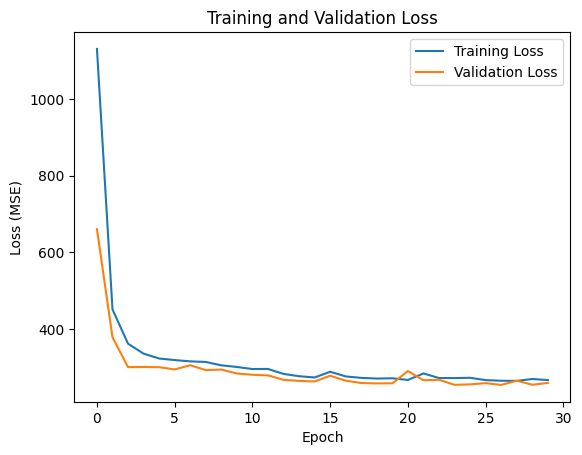

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()



In [36]:
# Check the accuracy (val_mse) from the history
best_val_mse = min(history.history['val_mse'])
best_val_mse

254.6737518310547

In [39]:

# Check the accuracy (val_mae) from the history
best_val_mae = min(history.history['val_mae'])
best_val_mae

11.585587501525879